# การบ้านครั้งที่ 2

วิดีโออธิบายอยู่ [ที่ https://youtu.be/sg24Rjd1cwk](https://youtu.be/sg24Rjd1cwk)

การบ้านข้อนี้ ตั้งใจให้นิสิตเห็นภาพการทำงานด้วยการเขียนโปรแกรมภาษา Python ดังนั้นจะมีโปรแกรมหลายส่วนที่ไม่ได้ตั้งใจให้นิสิต "เข้าใจ" การทำงานทั้งหมด ส่วนของโปรแกรมเหล่านั้นผู้เขียน "ตั้งใจ" ให้นิสิตเห็นภาพว่า สิ่งที่กำลังเรียนอยู่นั้น สามารถนำไปประยุกต์ใช้อย่างไรบ้าง

โปรแกรมนี้เขียนเพื่อเป็นตัวอย่างในการสร้างเส้นแนวโน้มของผู้ติดเชื้อในประเทศ ผู้เขียนได้นำข้อมูลจาก data.go.th มาใช้ เพื่อสร้างเป็นไฟล์ข้อมูลต้นฉบับ ข้อมูลที่เห็นเป็นผลการทำงานของข้อมูลจาก data.go.th 

ใน colab notebook นี้ มีเพียง cell เดียวที่ให้นิสิตแก้ไข ซึ่งจะมีระบุไว้ด้านล่างแล้ว **แต่เวลาทำงาน จะต้อง Run ตั้งแต่เซลล์แรก** จากนั้นจึงไปแก้ในเซลล์ที่กำหนดแล้วจึง Run ได้บ่อย ๆ ตามต้องการ

## Get Data (Run แค่ครั้งแรกพอ Run บ่อย ๆ จะช้า)

อ่านข้อมูลจาก Google Drive เป็นข้อมูลผู้ติดเชื้อในประเทศรายวันของประเทศไทยเริ่มตั้งแต่วันที่ 1 เมษายน 2564 ซึ่งอาจไม่ตรงกับในการรายงานของ ศบค. เนื่องจากมีการกรองข้อมูลผู้ติดเชื้อในทัณฑสถานและชาวต่างประเทศที่เดินทางมาจากประเทศออกไป

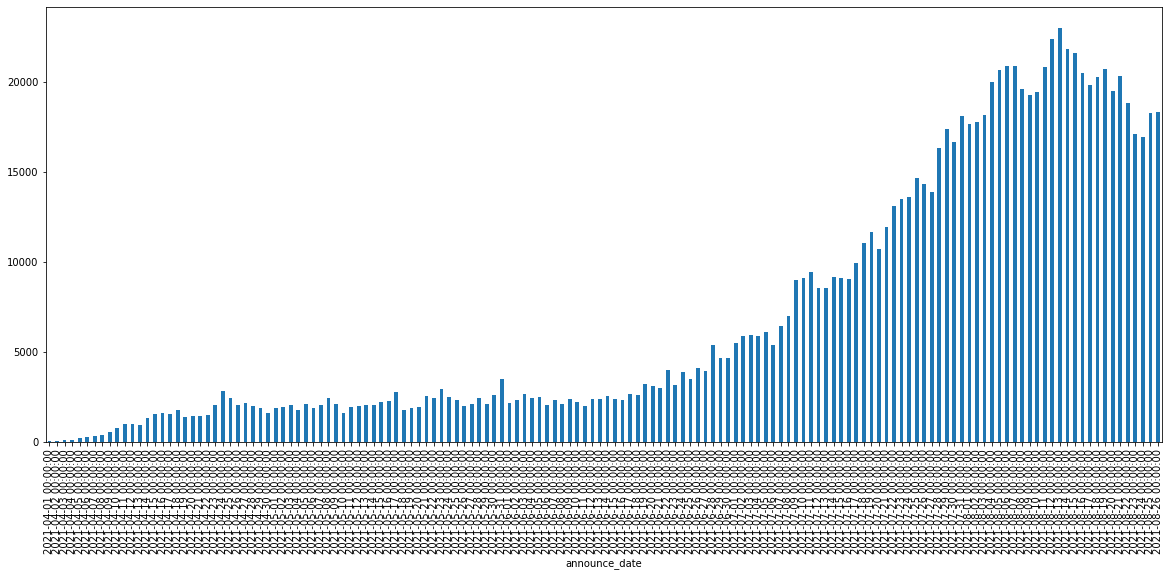

In [ ]:
#@title
import pandas as pd

url = 'https://drive.google.com/file/d/1edigloRtZGaShet2QW09I8vY1D4IUzQx/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df['announce_date']=pd.to_datetime(df['announce_date'])
df=df.set_index('announce_date')
df['No.'].plot(kind='bar',figsize=(20,8))

### Plot สวย ๆ ด้วย plotly (Run แค่ครั้งแรก)

In [ ]:
#@title
import plotly.graph_objects as go 

fig=go.Figure()
fig.add_trace(go.Bar(x=df.index,y=df['No.'],name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=df.index,y=df.rolling(7).mean()['No.'],
                         mode='lines',name='7-Day Moving Average',
                         line=dict(dash='dot')))
fig.update_layout(title="กราฟจำนวนผู้ติดเชื้อที่รายงานของประเทศไทย")

## ความพยายามในการสร้างเส้นแนวโน้มเพื่อประมาณจำนวนผู้ติดเชื้อในอีก 7 วันข้างหน้า 

จริง ๆ แล้ว เราสามารถเขียนโปรแกรมให้กระชับและสั้นกว่านี้ได้ แต่เพื่อให้นิสิตสามารถประยุกต์ใช้ความรู้เฉพาะส่วน Expression จึงต้องมีการปรับโปรแกรมให้ยาวขึ้นเล็กน้อย หน้าที่ของนิสิตคือการแก้ไขฟังก์ชัน ในเซลล์ด้านล่างนี้เพื่อเลือกสมการที่ใช้ทำนายแนวโน้ม

เช่น หากนิสิตคิดว่า นิสิตจะใช้สมการเส้นตรง $y=ax+b$ 
ซึ่งมีสัมประสิทธิ์สองตัวคือ $a$ และ $b$ นิสิตจะต้องกำหนดให้ฟังก์ชันรับพารามิเตอร์สามตัว คือ $x$,$a$,$b$ (ตัว $x$ ตัวหน้าสุดต้องคงไว้)  ซึ่งจะทำให้นิสิตสามารถเขียนโปรแกรมในฟังก์ชันด้านล่างเพื่อแทนสมการเส้นตรง $y=ax+b$ ได้เป็น

```
def f(x,a,b):
  y=a*x+b
  return y
```
นอกจากนี้จะมีตัวแปร days เพื่อเก็บจำนวนวันที่นิสิตต้องการใช้เพื่อสร้างเส้นแนวโน้ม เช่น หากนิสิตต้องการใช้ข้อมูลก่อนหน้า 7 วัน นิสิตสามารถกำหนดให้ตัวแปร days มีค่าเป็น 7 



#### ให้นิสิตแก้ไขเฉพาะในเซลล์นี้ ***เท่านั้น***

ให้ส่งเฉพาะ source code ในเซลล์นี้เท่านั้น โดยส่งในไฟล์ที่ตั้งชื่อตามรูปแบบ HW2_เลขประจำตัวนิสิต.py ใน MyCourseVille ของวิชา 

การตรวจจะถือเอาการเขียนโปรแกรมที่ถูกต้อง สามารถทำงานได้ และสามารถปรับกราฟด้านล่างสุดให้เหมาะสมกับสถานการณ์ได้

**หมายเหตุ** เนื่องจากสมการเส้นตรงถูกใช้เป็นตัวอย่างแล้ว จึงไม่อนุญาตให้ส่งสมการเส้นตรงมาในการบ้าน

In [ ]:
import math 

def f(x,a,b,c,d):
  # นิสิตเขียนโปรแกรมเพื่อคำนวณค่า y ในส่วนนี้
  # สามารถเพิ่มบรรทัดเองได้ แต่จำเป็นต้องมี statement ที่คำนวณค่า y
  y=a*x**3+b*x**2+c*x+d # ตัวอย่างการคำนวณ y
  return y

days=30 # นิสิตสามารถแก้ไขค่าตัวแปรนี้ได้ตามต้องการ 
student_name='นายเส้นตรง อย่างง่าย' # นิสิตแก้ชื่อของนิสิตในตำแหน่ง

### ใช้ฟังก์ชันที่นิสิตกำหนดมาสร้างเส้นแนวโน้ม



In [ ]:
#@title
from scipy.optimize import curve_fit
import numpy as np
import datetime 
from inspect import signature

def f2(X,p):
  return np.array([f(x,*p) for x in list(X)])

def f1(*p):
  return f2(p[0],p[1:])

number_of_coefs = len(signature(f).parameters) - 1
selected_data=df['No.'][-days:]
data_y=np.array(list(selected_data))
data_x=np.array([i for i in range(len(data_y))])
p,_=curve_fit(f1,data_x,data_y,p0=[0]*number_of_coefs)
print(p)
show_x=list(selected_data.index)+[df['No.'].index[-1]+datetime.timedelta(i) for i in range(1,8)]
predicted_x=[i for i in range(len(data_y)+7)]
predicted_y=f2(predicted_x,p)

fig=go.Figure()
fig.add_trace(go.Bar(x=df.index,y=df['No.'],name='Confirmed Cases',marker=dict(color='rgba(135, 180, 220, 0.5)')))
fig.add_trace(go.Bar(x=show_x[-7:],y=list(predicted_y)[-7:],name='Trended Confirmed Cases',marker=dict(color='grey')))
fig.add_trace(go.Scatter(x=df.index,y=df.rolling(7).mean()['No.'],
                         mode='lines',name='7-Day Moving Average',
                         line=dict(dash='dot',color='red')))
fig.update_layout(title="กราฟจำนวนผู้ติดเชื้อที่รายงานของประเทศไทย รวมกับสีเทาจากการทำนายของ"+student_name)

[-1.38786357e-01 -1.52448328e+01  5.91203091e+02  1.60951683e+04]
